In [1]:
# https://towardsdatascience.com/how-to-access-data-from-the-twitter-api-using-tweepy-python-e2d9e4d54978

import pandas as pd
import tweepy
import wordcloud
wordcloud = wordcloud.WordCloud()

import warnings
warnings.filterwarnings('ignore')

client = tweepy.Client(bearer_token='token') # tomar el token que da twitter 

In [2]:
query = '#Cristina -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'], max_results=100)
df_cristina = pd.DataFrame(tweets.data)
df_cristina['origen'] = 'Cristina'
df_cristina.to_csv('df_cristina.csv')

In [3]:
query = '#Macri -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'], max_results=100)
df_macri = pd.DataFrame(tweets.data)
df_macri['origen'] = 'Macri'
df_macri.to_csv('df_macri.csv')

In [4]:
df_politica = pd.concat([df_cristina,df_macri])
df_politica.to_csv('df_politica.csv')

In [5]:
query = '#River -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'], max_results=100)
df_river = pd.DataFrame(tweets.data)
df_river['origen'] = 'River'
df_river.to_csv('df_river.csv')

In [6]:
query = '#Boca -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'], max_results=100)
df_boca = pd.DataFrame(tweets.data)
df_boca['origen'] = 'Boca'
df_boca.to_csv('df_boca.csv')

In [7]:
df_futbol=pd.concat([df_river,df_boca])
df_futbol.to_csv('df_futbol.csv')

In [8]:
query = '#dolar -is:retweet lang:es'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'], max_results=100)
df_dolar = pd.DataFrame(tweets.data)
df_dolar['origen'] = 'dolar'
df_dolar.to_csv('df_dolar.csv')

In [9]:
query = '#inflacion -is:retweet lang:es'
tweets = client.search_recent_tweets(query=query, tweet_fields=['geo','created_at','attachments','author_id','conversation_id','in_reply_to_user_id'] , max_results=100)
df_inflacion = pd.DataFrame(tweets.data)
df_inflacion['origen'] = 'inflacion'
df_inflacion.to_csv('df_inflacion.csv')

In [10]:
df_economia=pd.concat([df_dolar,df_inflacion])
df_economia.to_csv('df_economia.csv')

In [11]:
df = df_politica.copy()
df["text"] = df["text"].str.lower() # paso todo a minuscula
df["text"] = df["text"].str.replace(u"\u00A0", " " ,regex=True) # elimino nbs y espacios raros
df["text"] = df["text"].str.replace("\xc2\xa0", " " ,regex=True) # elimino nbs y espacios raros
df["text"] = df["text"].str.replace("https", "" ,regex=True) # elimino nbs y espacios raros
df['text'] = df['text'].str.replace(r'\b\w{1,3}\b', "" ,regex=True) # Elimino palabras de 1 a 3 letras
df['text'] = df['text'].str.replace(r'[^\w\s]', "" ,regex=True) # Elimino palabras de 1 a 3 letras

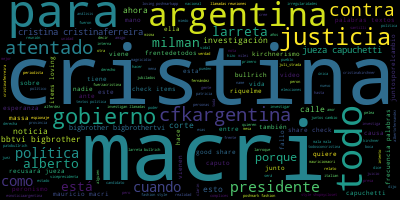

In [12]:
palabras = " ".join(df['text'])
wordcloud.generate(palabras)
wordcloud.to_image()

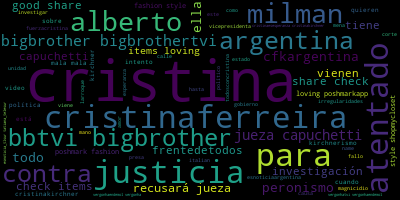

In [13]:
palabras = " ".join(df['text'][df['origen'] == 'Cristina'])
wordcloud.generate(palabras)
wordcloud.to_image()

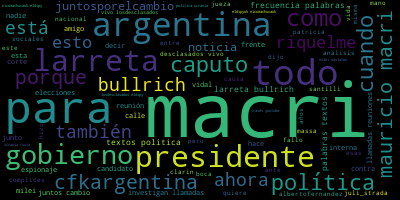

In [14]:
palabras = " ".join(df['text'][df['origen'] == 'Macri'])
wordcloud.generate(palabras)
wordcloud.to_image()

In [15]:
from collections import Counter

df['tokens'] = df["text"].str.split() # tokenizo
palabras = []
for token in df['tokens']:
    palabras = palabras + token
palabras = Counter(palabras).most_common()
# palabras = Counter(palabras).most_common(10) #si quiero las x palabras mas repetidas
df_palabras = pd.DataFrame(palabras, columns = ['palabra', 'repet'])
df_palabras['cum_percent'] = 100*(df_palabras['repet'].cumsum() / df_palabras['repet'].sum())

In [16]:
palabras = []
for token in df['tokens'][df['origen'] == 'Cristina']:
    palabras = palabras + token
palabras = Counter(palabras).most_common()
# palabras = Counter(palabras).most_common(10) #si quiero las x palabras mas repetidas
df_palabras_cristina = pd.DataFrame(palabras, columns = ['palabra', 'repet'])
df_palabras_cristina['cum_percent'] = 100*(df_palabras_cristina['repet'].cumsum() / df_palabras_cristina['repet'].sum())

In [17]:
palabras = []
for token in df['tokens'][df['origen'] == 'Macri']:
    palabras = palabras + token
palabras = Counter(palabras).most_common()
# palabras = Counter(palabras).most_common(10) #si quiero las x palabras mas repetidas
df_palabras_macri = pd.DataFrame(palabras, columns = ['palabra', 'repet'])
df_palabras_macri['cum_percent'] = 100*(df_palabras_macri['repet'].cumsum() / df_palabras_macri['repet'].sum())